In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from openai import OpenAI
client=OpenAI(api_key='')

In [4]:
import pandas as pd
df=pd.read_csv("/content/drive/MyDrive/PROJECTS/Building an AI Agent using OpenAI API/loan_prediction.csv")

In [3]:
def create_summary(df):
  summary=f"The dataset has {df.shape[0]} rows and {df.shape[1]} columns.\n"
  summary+="Columns.\n"
  for col in df.columns:
    summary+=f"-{col}(type:{df[col].dtype})\n"
  return summary

In [5]:
def ai_agent(user_query,df):
  data=create_summary(df)
  prompt = f"""
You are a data expert AI agent.

You have been provided with this dataset summary:
{data}

Now, based on the user's question:
'{user_query}'

Think step-by-step. Assume you can access and analyze the dataset like a Data Scientist would using Pandas.

Give a clear, final answer.
    """
  response=client.chat.completions.create(
      model="gpt-4o",
      messages=[{
          "role":"user",
          "content":prompt
          }],
      temperature=0.2,
      max_tokens=500

  )
  answer=response.choices[0].message.content
  return answer

In [7]:
print("Welcome to Loan Review AI Agent!")
print("You can ask anything about the loan applicants data.")
print("Type 'exit' to quit.")

while True:
    user_input = input("\nYour question: ")
    if user_input.lower() == "exit":
        break
    response = ai_agent(user_input, df)
    print("\nAI Agent Response:")
    print(response)

Welcome to Loan Review AI Agent!
You can ask anything about the loan applicants data.
Type 'exit' to quit.
Your question: What is the average loan amount applied for by all applicants?

Step 1: Analyze the 'LoanAmount' column in the dataset.
Step 2: Calculate the mean value.

Result:
The average loan amount applied for by all applicants is ₹146.41 thousand.

Your question: Who has the highest applicant income?

Step 1: Find the maximum value in the 'ApplicantIncome' column.

Result:
The highest applicant income is ₹81,000.

Your question: How many applicants are self-employed?

Step 1: Filter the dataset where 'Self_Employed' is 'Yes'.

Result:
There are 82 self-employed applicants.

Your question: exit
Exiting...


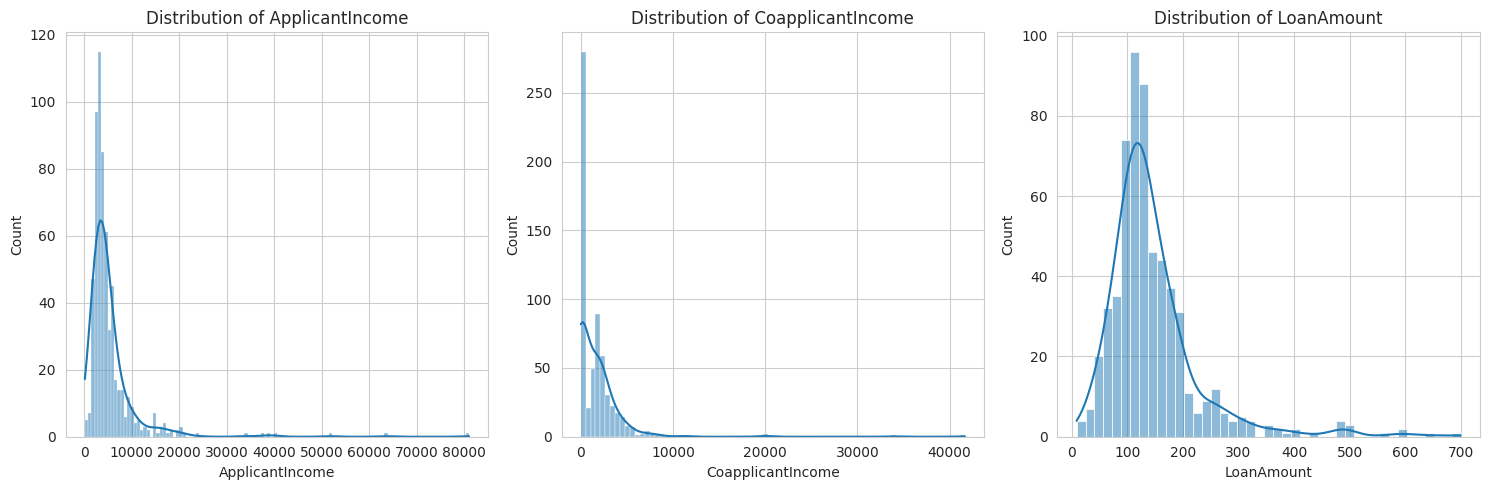

/tmp/ipython-input-28-2763015159.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='viridis')
/tmp/ipython-input-28-2763015159.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='viridis')
/tmp/ipython-input-28-2763015159.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='viridis')
/tmp/ipython-input-28-2763015159.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` 

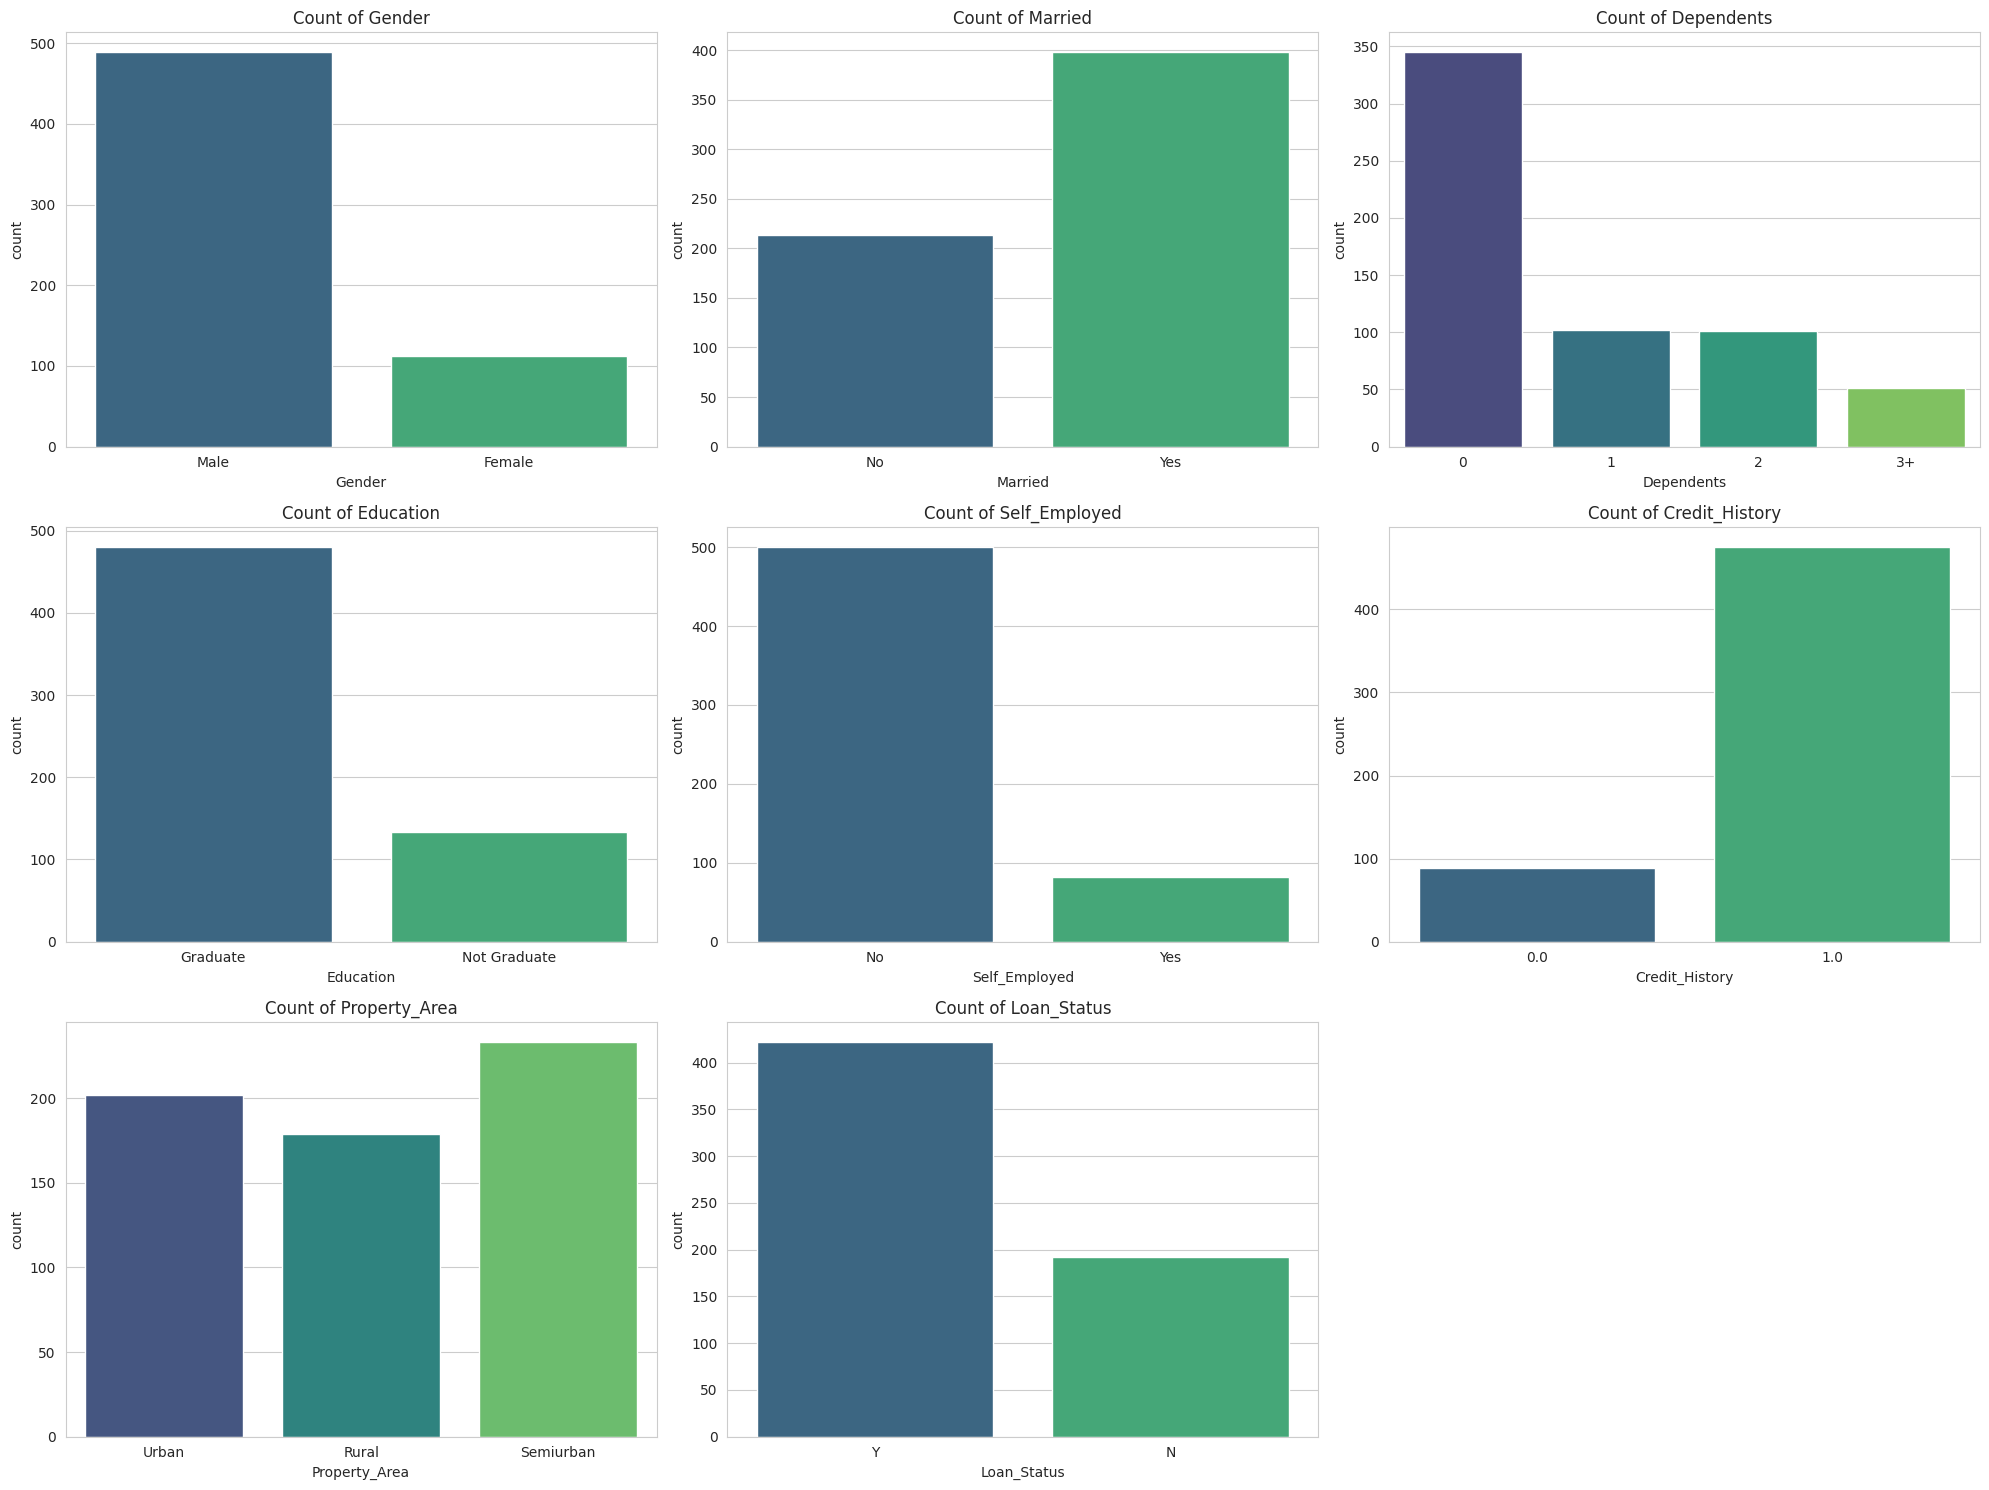

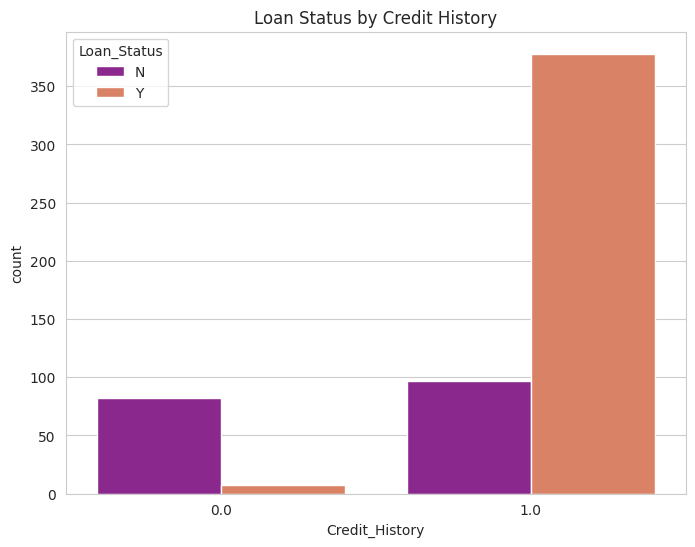

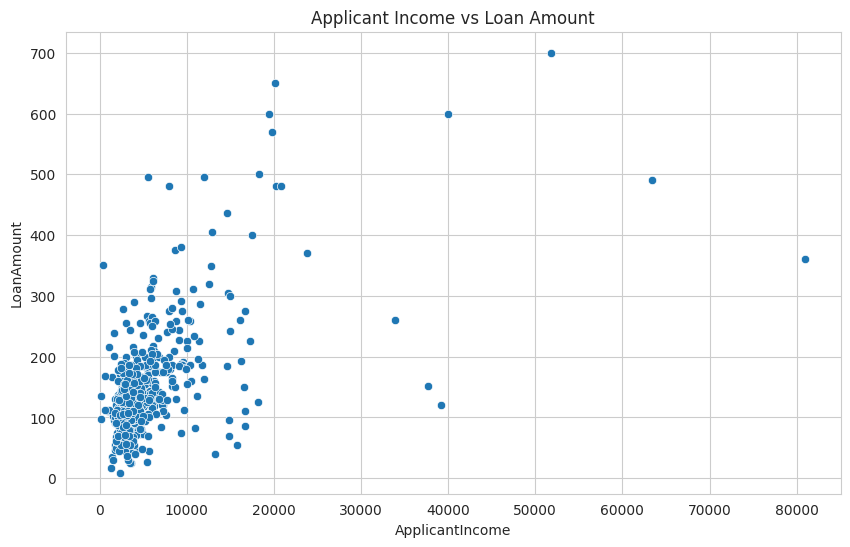

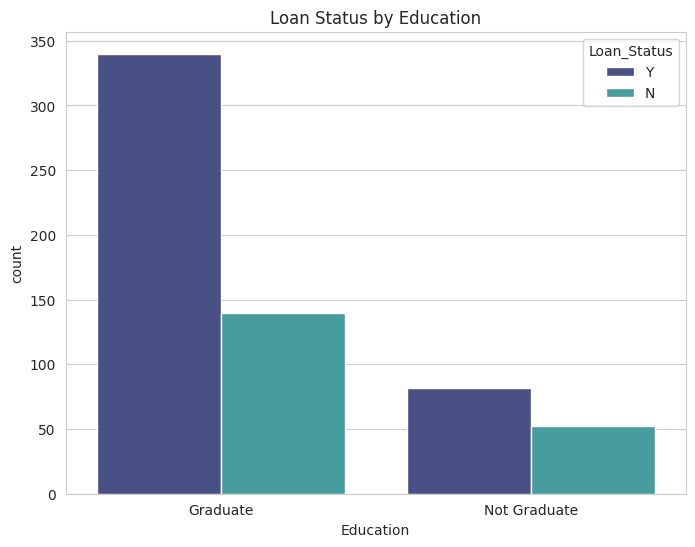

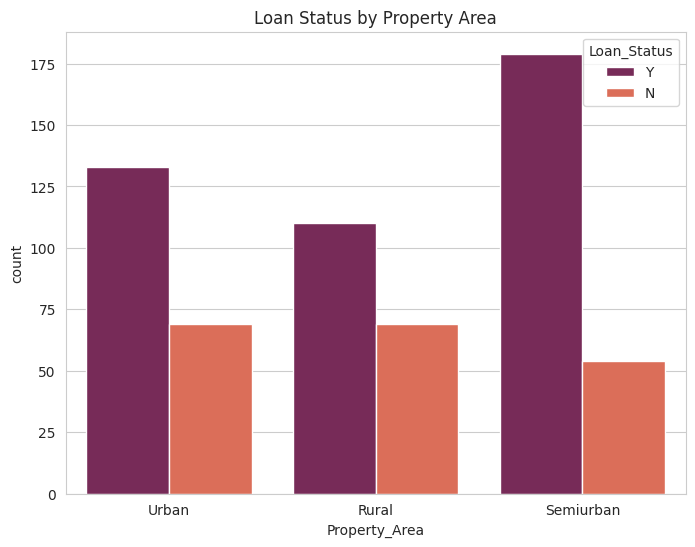

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set_style("whitegrid")

# Histograms for numerical columns
numerical_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
plt.figure(figsize=(15, 5))
for i, col in enumerate(numerical_cols):
    plt.subplot(1, 3, i + 1)
    sns.histplot(df[col].dropna(), kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# Bar plots for categorical columns
categorical_cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area', 'Loan_Status']
plt.figure(figsize=(20, 15))
for i, col in enumerate(categorical_cols):
    plt.subplot(3, 3, i + 1)
    sns.countplot(x=col, data=df, palette='viridis')
    plt.title(f'Count of {col}')
plt.tight_layout()
plt.show()

# Relationship between Credit_History and Loan_Status
plt.figure(figsize=(8, 6))
sns.countplot(x='Credit_History', hue='Loan_Status', data=df, palette='plasma')
plt.title('Loan Status by Credit History')
plt.show()

# Relationship between ApplicantIncome and LoanAmount
plt.figure(figsize=(10, 6))
sns.scatterplot(x='ApplicantIncome', y='LoanAmount', data=df)
plt.title('Applicant Income vs Loan Amount')
plt.show()

# Relationship between Education and Loan_Status
plt.figure(figsize=(8, 6))
sns.countplot(x='Education', hue='Loan_Status', data=df, palette='mako')
plt.title('Loan Status by Education')
plt.show()

# Relationship between Property_Area and Loan_Status
plt.figure(figsize=(8, 6))
sns.countplot(x='Property_Area', hue='Loan_Status', data=df, palette='rocket')
plt.title('Loan Status by Property Area')
plt.show()